In [1]:
# import required libraries
import pandas
import matplotlib.pyplot as plt
import seaborn
import os

In [2]:
# declare constants
PATH = [os.path.join("raw_data", "clinicaltrial_data.csv"), os.path.join("raw_data", "mouse_drug_data.csv")]
TUMOR_START = 45
def setup(function):
    """Takes a lambda function that takes a dataframe. returns a dict set up per spec"""
    result = {}
    for each in trial_data["Drug"].unique():
        result[each] = {}
        for other in trial_data["Timepoint"].unique():
            ball = trial_data.loc[trial_data["Drug"] == each]
            ball = ball.loc[ball["Timepoint"] == other]
            result[each][other] = function(ball)
    return result
def pretty_picture(df, ylabel):
    """Takes a dataframe of the format we're using for our results. sets it up as a matplotlib plot. returns True if successful"""
    colorlist = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", "#aa6e28", "#e6beff", "#008080"]
    markerlist = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s" "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    ball = []
    plt.figure(figsize = (22, 10))
    for each in range(len(df.columns)):
        ball.append(plt.errorbar(df.index, df[df.columns[each]], label = df.columns[each], color = colorlist[each], marker = markerlist[each], yerr = result.sem(axis = 0)[each]))
    plt.legend(loc = "best")
    plt.xlabel("Time (in days)")
    plt.ylabel(ylabel)
    plt.grid(alpha = .25)

In [3]:
# import data
trial_data = pandas.read_csv(PATH[0])
mouse_data = pandas.read_csv(PATH[1])

In [4]:
# set up our data
# we want mousedata to be a dict.
# mouse_data[mouse_ID] will return the drug that mouse took
mouse_data.index = mouse_data["Mouse ID"]
mouse_data = mouse_data.drop("Mouse ID", axis = 1)
mouse_data = mouse_data.to_dict()["Drug"]
# add a drug column with which drug that mouse took
trial_data["Drug"] = trial_data["Mouse ID"].map(mouse_data)

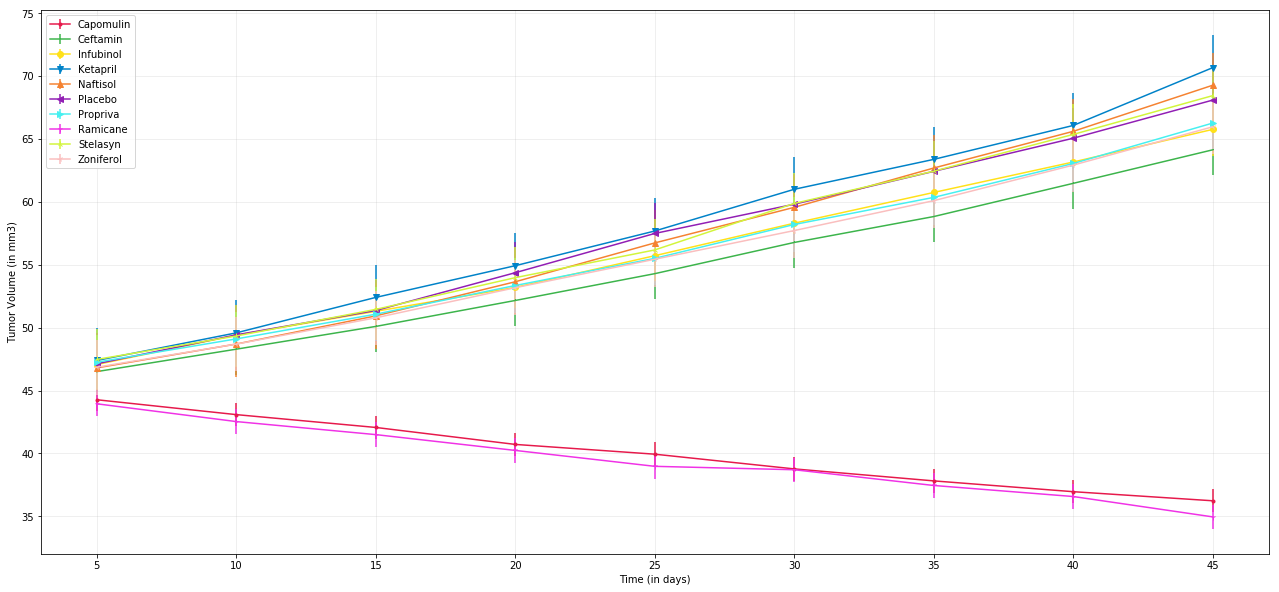

In [5]:
# tumor response to treatment chart
# we want our result chart to have an index of timepoints, and columns of drugs
result = pandas.DataFrame(setup(lambda x: x["Tumor Volume (mm3)"].mean()))
# we'll want this for later
percent_change = result.iloc[-1].map(lambda x: (x - TUMOR_START) / TUMOR_START)
result = result.drop(0)
pretty_picture(result, "Tumor Volume (in mm3)")
plt.show()

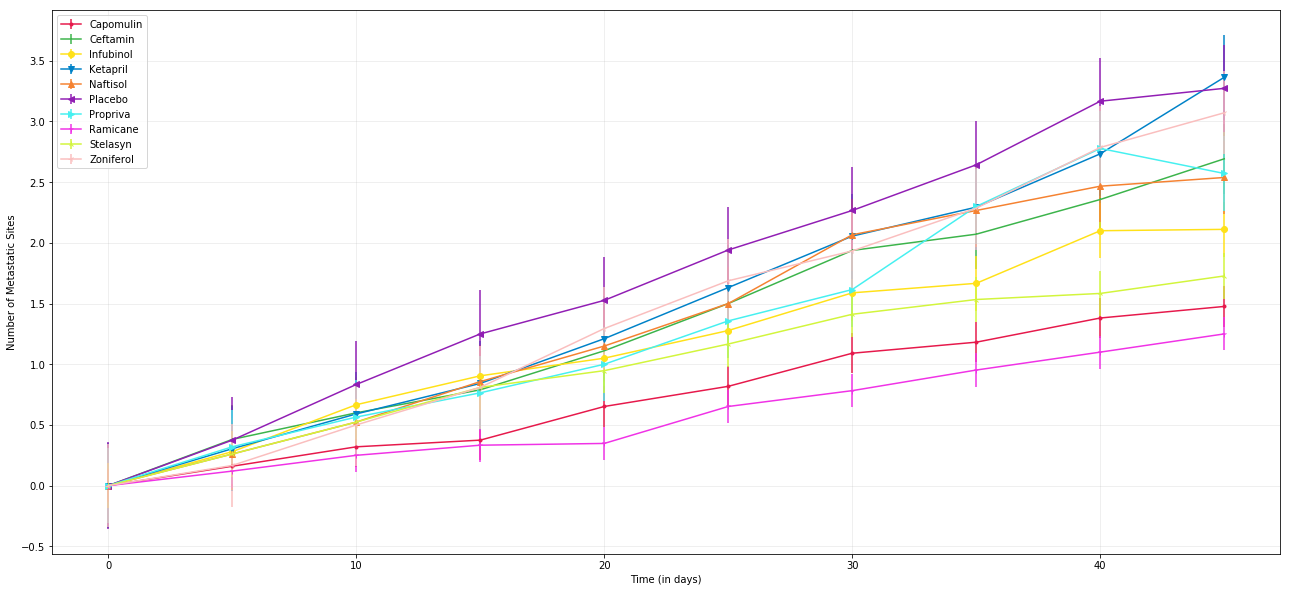

In [6]:
# literally exact same deal, but for metastatic sites
# make a funtion?
# yes. all parts of this project are basically identical.
# refactored
result = pandas.DataFrame(setup(lambda x: x["Metastatic Sites"].mean()))
pretty_picture(result, "Number of Metastatic Sites")
plt.show()

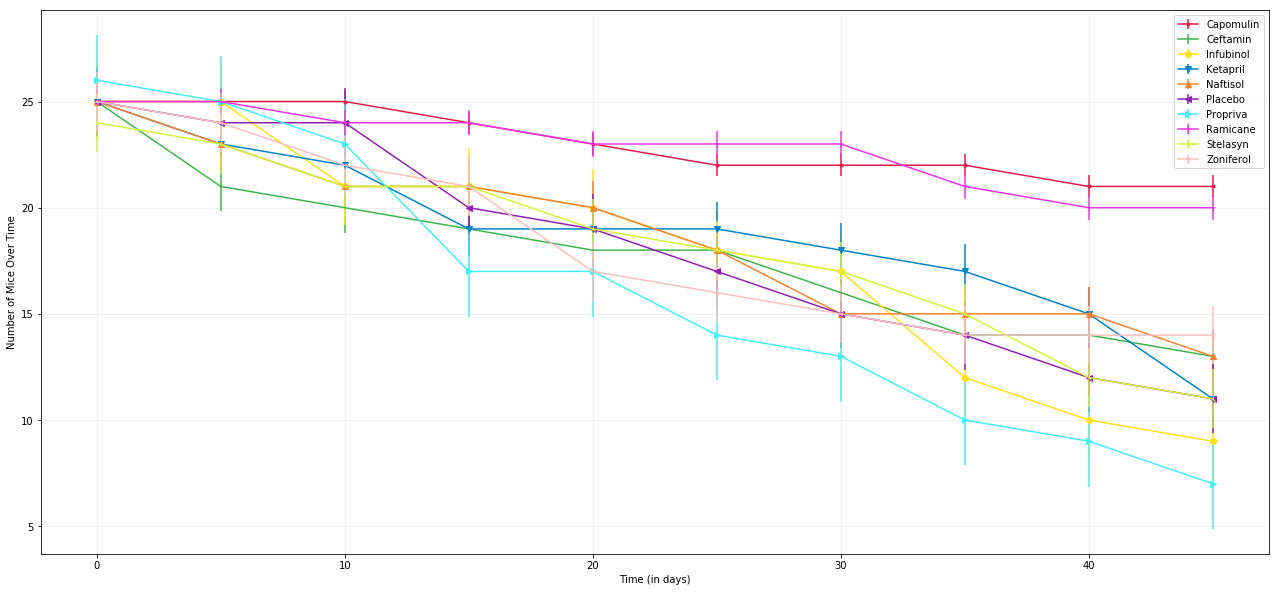

In [7]:
# survival rate
result = pandas.DataFrame(setup(lambda x: len(x["Mouse ID"])))
pretty_picture(result, "Number of Mice Over Time")
plt.show()

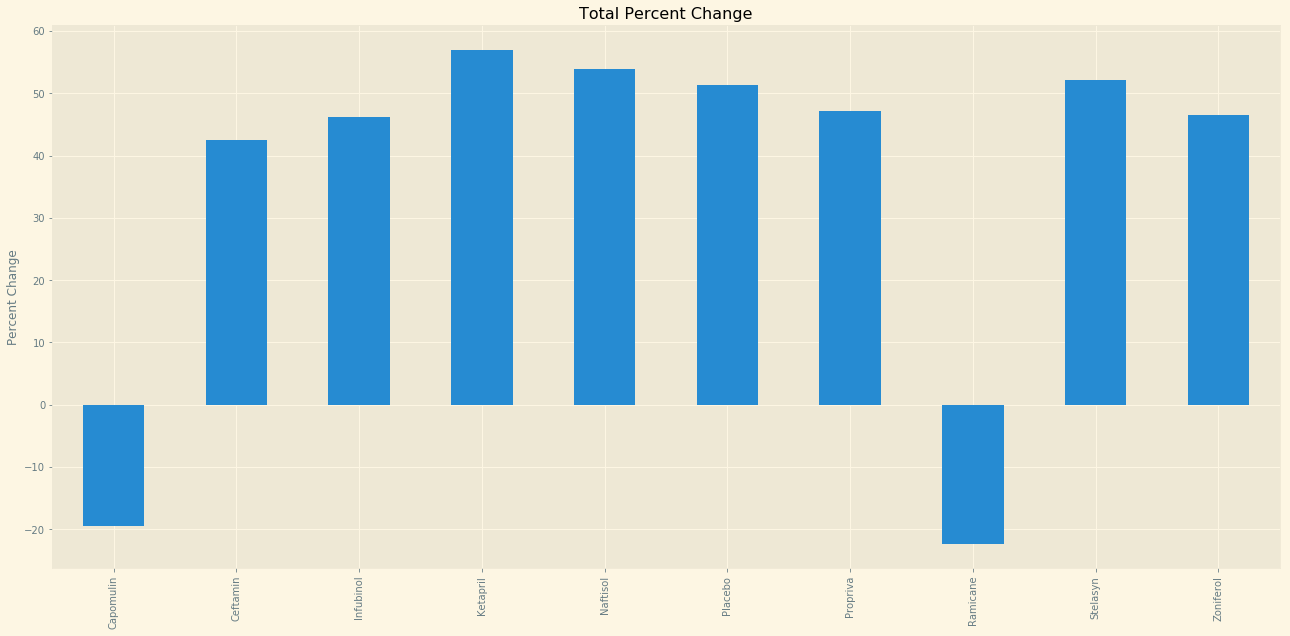

In [8]:
# percent change
# this is where that variable we set earlier comes in
# TODO:
# plotting. our values are where we want them
percent_change = percent_change.map(lambda x: round(x * 100, 2))
with plt.style.context("Solarize_Light2"):
    percent_change = percent_change.plot(kind = "bar", figsize = (22, 10))
    percent_change.set_title("Total Percent Change")
    percent_change.set_ylabel("Percent Change")
    plt.show()